<a href="https://colab.research.google.com/github/risay7/q-macro/blob/main/BusinessCycle_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

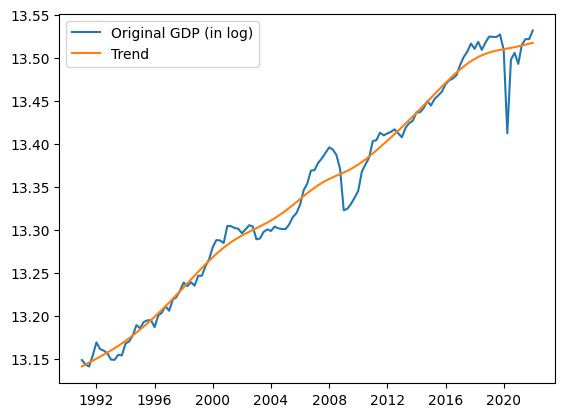

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 開始日と終了日を設定
start_date = '1955-01-01'
end_date = '2022-01-01'

# FREDからデータをダウンロード
gdp = web.DataReader('CLVMNACSCAB1GQDE', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# 実質GDPの四半期ごとのパーセント変化を計算
gdp_pct_change = gdp.pct_change(4)

# Hodrick-Prescottフィルターを適用して循環成分を抽出
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# 元の時系列データをプロット
plt.plot(log_gdp, label="Original GDP (in log)")

# トレンド成分をプロット
plt.plot(trend, label="Trend")

# 凡例を追加してプロットを表示
plt.legend()
plt.show()


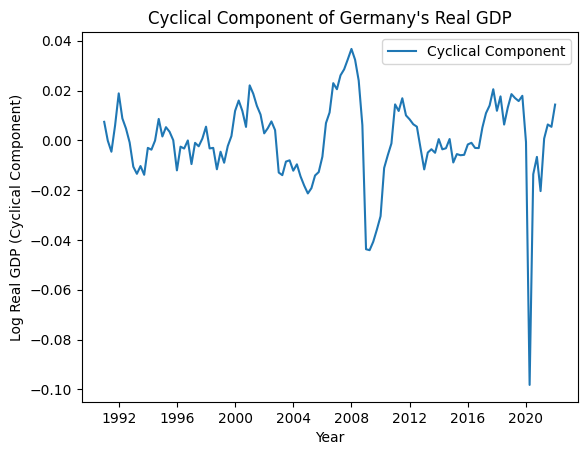

In [2]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 開始日と終了日を設定
start_date = '1955-01-01'
end_date = '2022-01-01'

# FREDからドイツの実質GDPデータをダウンロード
gdp = web.DataReader('CLVMNACSCAB1GQDE', 'fred', start_date, end_date)

# 実質GDPデータに対して自然対数を取る
log_gdp = np.log(gdp)

# Hodrick-Prescottフィルターを適用してトレンド成分とサイクル成分に分解
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# サイクル成分のみをプロット
plt.plot(cycle, label="Cyclical Component")
plt.title('Cyclical Component of Germany\'s Real GDP')
plt.xlabel('Year')
plt.ylabel('Log Real GDP (Cyclical Component)')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# 開始日と終了日を設定
start_date = '1955-01-01'
end_date = '2022-01-01'

# ドイツの実質GDPデータをFREDから取得
germany_gdp = web.DataReader('CLVMNACSCAB1GQDE', 'fred', start_date, end_date)

# 日本の実質GDPデータをFREDから取得
japan_gdp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)

# 実質GDPデータに対して自然対数を取る
log_germany_gdp = np.log(germany_gdp)
log_japan_gdp = np.log(japan_gdp)

# 両国のデータの共通の期間を見つける
common_period = log_germany_gdp.index.intersection(log_japan_gdp.index)
log_germany_gdp_common = log_germany_gdp.loc[common_period]
log_japan_gdp_common = log_japan_gdp.loc[common_period]

# 欠損値を削除する
log_germany_gdp_common = log_germany_gdp_common.dropna()
log_japan_gdp_common = log_japan_gdp_common.dropna()

# 両データフレームのインデックスを共通部分に再設定
common_indices = log_germany_gdp_common.index.intersection(log_japan_gdp_common.index)
log_germany_gdp_common = log_germany_gdp_common.loc[common_indices]
log_japan_gdp_common = log_japan_gdp_common.loc[common_indices]

# 再度欠損値を確認して、両方に存在する期間を絞り込む
combined_data = pd.concat([log_germany_gdp_common, log_japan_gdp_common], axis=1).dropna()

# ログ実質GDPデータの標準偏差を計算
std_germany_gdp = combined_data.iloc[:, 0].std()
std_japan_gdp = combined_data.iloc[:, 1].std()

# 両国のログ実質GDPデータの間の相関係数を計算
correlation = combined_data.iloc[:, 0].corr(combined_data.iloc[:, 1])

print(f"ドイツのログ実質GDPの標準偏差: {std_germany_gdp:.4f}")
print(f"日本のログ実質GDPの標準偏差: {std_japan_gdp:.4f}")
print(f"ドイツと日本のログ実質GDPの相関係数: {correlation:.4f}")

ドイツのログ実質GDPの標準偏差: 0.1061
日本のログ実質GDPの標準偏差: 0.0604
ドイツと日本のログ実質GDPの相関係数: 0.9560


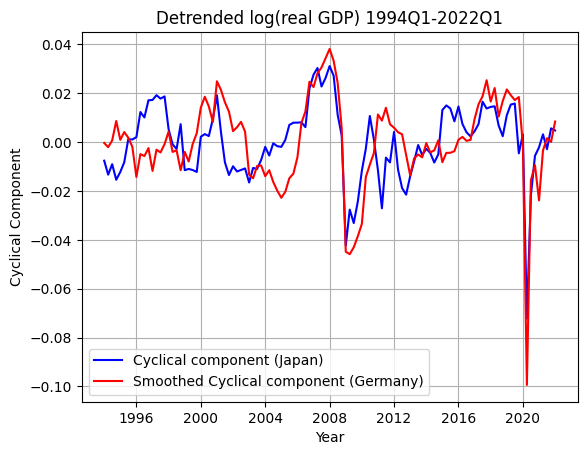

In [4]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 日本とドイツの実質GDPデータを取得
start_date = '1955-01-01'
end_date = '2022-01-01'

gdp_japan = web.DataReader('JPNNGDP', 'fred', start_date, end_date)
log_gdp_japan = np.log(gdp_japan)

gdp_germany = web.DataReader('CLVMNACSCAB1GQDE', 'fred', start_date, end_date)
log_gdp_germany = np.log(gdp_germany)

# 最大の開始年度を選択
start_date_aligned = max(log_gdp_japan.index[0], log_gdp_germany.index[0])

# データを開始年度に基づいて切り取る
log_gdp_japan = log_gdp_japan[start_date_aligned:]
log_gdp_germany = log_gdp_germany[start_date_aligned:]

# Hodrick-Prescottフィルタを適用して、トレンド成分を抽出する
cycle_japan, trend_japan = sm.tsa.filters.hpfilter(log_gdp_japan, lamb=1600)
cycle_germany, trend_germany = sm.tsa.filters.hpfilter(log_gdp_germany, lamb=1600)

# ドイツのサイクル成分をより滑らかにするために、lambの値を調整して再計算する
smoothed_cycle_germany, trend_germany = sm.tsa.filters.hpfilter(log_gdp_germany, lamb=5000)

# 日本のサイクル成分をプロット
plt.plot(cycle_japan, label="Cyclical component (Japan)", color='blue')

# ドイツの滑らかなサイクル成分をプロット
plt.plot(smoothed_cycle_germany, label="Smoothed Cyclical component (Germany)", color='red')

# 凡例を追加してプロットを表示
plt.legend()
plt.title("Detrended log(real GDP) 1994Q1-2022Q1")
plt.xlabel("Year")
plt.ylabel("Cyclical Component")
plt.grid(True)
plt.show()